## [Singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of word vectors

### Author: [Dr. Rahul Remanan](https://www.linkedin.com/in/rahulremanan/)
### CEO, [Moad Computer](http://www.moad.computer/)

# Import libraries

In [1]:
import re, numpy as np
from itertools import chain
from matplotlib import pyplot as plt

la = np.linalg

# Example text corpus

In [2]:
corpus = ['I like deep learning.',
          'I like NLP.',
          'I enjoy flying.']

# Process text corpus

In [3]:
def clean_corpus(c_words, exclude_chars=['',' ']):
  cleaned_words = []
  for cw in c_words:
    for ec in exclude_chars:
      for w in cw:
        if w==ec:
          cw.remove(ec)
    cleaned_words.append(cw)
    del cw
  del c_words
  return cleaned_words

In [4]:
def build_pairs(words):
  w_pairs = []
  for i, w in enumerate(words):
    for j, wp in enumerate(words):
      if j==i+1:
        w_pair = [w, wp]
        w_pair.sort()
        w_pairs.append(w_pair)
        del w_pair
      elif j>i+1:
        break
  del words
  return w_pairs

In [5]:
def word_pairs(corpus, exclude_chars=['',' ']):
  c_words = list(map(lambda w: re.split(r'(\W+)', w), corpus))
  words = list(set(list(chain.from_iterable(c_words))) - set(exclude_chars))
  words.sort()
  c_words = clean_corpus(c_words, exclude_chars=exclude_chars)
  w_pairs = list(map(lambda cw: build_pairs(cw), c_words))
  del c_words  
  w_dict = dict.fromkeys(words)
  for i, w in enumerate(words):
    w_dict[w] = i
  wp_mat = np.zeros((len(words), len(words))).astype(np.uint8)  
  for wp in w_pairs:
    for p in wp:
      wp_mat[w_dict[p[0]]][w_dict[p[1]]] += 1
      wp_mat[w_dict[p[1]]][w_dict[p[0]]] += 1
  del w_dict, w_pairs
  return words, wp_mat

# [Co-occurrence matrix](https://youtu.be/ASn7ExxLZws?t=1655) and generate output plot

In [6]:
w, X = word_pairs(corpus, exclude_chars=['',' '])

In [7]:
U, s, Vh = la.svd(X, full_matrices=False)

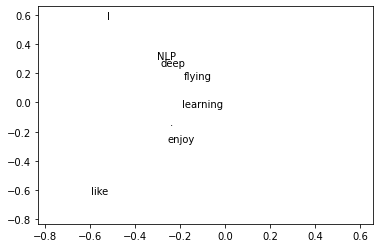

In [8]:
for i in range(len(w)):
  plt.axis([np.min(np.min(U, axis=0))-0.2, np.max(np.max(U, axis=0)),
            np.min(np.min(U, axis=1))-0.2, np.max(np.max(U, axis=1))])
  plt.text(U[i,0], U[i,1], w[i])

# References

### 1. [Stanford University School of Engineering lecture video on GloVe word embeddings](https://www.youtube.com/watch?v=ASn7ExxLZws).

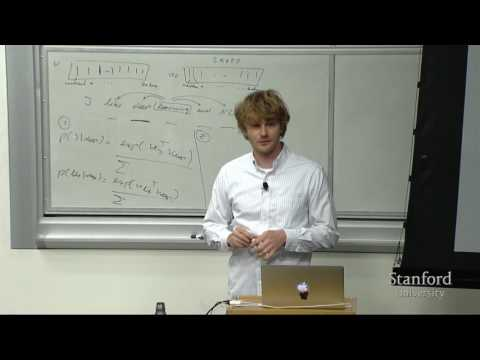

In [9]:
# Stanford Engineering lecture video on global vectors for word representation
from IPython.display import YouTubeVideo
YouTubeVideo('ASn7ExxLZws', width=640, height=480)